In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq
import string
import os
import glob
import re
import pandas as pd

def read_txt(path, f):
    f1 = open(f, 'a+')
    for im in glob.glob(path+'/*.txt'):
        f2 = open(im, 'r')
        for eachLine in f2:
            f1.write(eachLine + '\n')
            #f1.write('\n')
        f2.close()

def calculate(tokenize, dic):
    bg_feature = np.zeros(len(dic))
    for token in tokenize:
        if token in dic:
            token_index = dic.index(token)
            bg_feature[token_index] = bg_feature[token_index] + 1
        else:
            continue
    return bg_feature

def sigmoid(x):
    if x < 0:
        s = 1 - (1 / (1 + math.exp(x)))
    else:
        s = 1 / (1 + math.exp(-x))
    return s


In the cell above, I tried to write all the .txt files in the same folder into one text file, and then I could calculate the feature in one time. And now I'm trying to write the predefined dictionary as variable 'dic'


In [2]:
path = "/Users/muzo01/Cpp_projects/hw3_data/spam"
path_1 = "/Users/muzo01/Cpp_projects/hw3_data/spam" + '/'
files = os.listdir(path)
#Change .dat file to .txt file
for filename in files:

    portion = os.path.splitext(filename)

    if portion[1] ==".dat":
        newname = portion[0] +".txt"
        filenamedir = path_1+filename
        newnamedir = path_1+newname

        os.rename(filenamedir, newnamedir)
        
# Acquire predifined dictionary
file = open('/Users/muzo01/Cpp_projects/hw3_data/spam/dic.txt','r')
dic = file.read().splitlines()
file.close
#print(dic)

<function TextIOWrapper.close()>


Then acquire the tokenize of training datasets and test datasets.


In [3]:
path_spam_train = "/Users/muzo01/Cpp_projects/hw3_data/spam/train/spam"
path_ham_train = "/Users/muzo01/Cpp_projects/hw3_data/spam/train/ham"

path_spam_test = "/Users/muzo01/Cpp_projects/hw3_data/spam/test/spam"
path_ham_test = "/Users/muzo01/Cpp_projects/hw3_data/spam/test/ham"

f_spam_train =  "/Users/muzo01/Cpp_projects/hw3_data/spam/train/token_spam.txt"
f_ham_train = "/Users/muzo01/Cpp_projects/hw3_data/spam/train/token_ham.txt"

f_spam_test = "/Users/muzo01/Cpp_projects/hw3_data/spam/test/token_spam.txt"
f_ham_test = "/Users/muzo01/Cpp_projects/hw3_data/spam/test/token_ham.txt"

read_txt(path_spam_train, f_spam_train)
read_txt(path_ham_train, f_ham_train)
read_txt(path_spam_test, f_spam_test)
read_txt(path_ham_test, f_ham_test)

In [7]:
list_spam_train = []
list_ham_train = []
list_spam_test = []
list_ham_test = []

f1 = open(f_spam_train, "r")
lines1 = f1.readlines()
for i in range(0,lines1.__len__(),1):
    for word in lines1[i].split():
        word = word.strip(string.punctuation)
        word = word.strip(string.digits)
        word = word.strip(string.whitespace)
        list_spam_train.append(word);
        
list_spam_train = [word.lower() for word in list_spam_train if len(word) > 0]
#print(list_spam_train)

f2 = open(f_ham_train, "r")
lines2 = f2.readlines()
for j in range(0,lines2.__len__(),1):
    for word in lines2[j].split():
        word = word.strip(string.punctuation)
        word = word.strip(string.digits)
        word = word.strip(string.whitespace)
        list_ham_train.append(word);
        
list_ham_train = [word.lower() for word in list_ham_train if len(word) > 0]
#print(list_ham_train)

b1_feature = calculate(list_spam_train, dic)
b2_feature = calculate(list_ham_train, dic)
#print(b1_feature)
#print(b2_feature)

list_a = b1_feature.tolist()
list_b = b2_feature.tolist()
max_spam_index_list = list(map(list_a.index, heapq.nlargest(3, list_a)))
max_ham_index_list = list(map(list_b.index, heapq.nlargest(3, list_b)))

print(max_spam_index_list)
for ind1 in max_spam_index_list:
    print(list_spam_train[ind1])
    print(b1_feature[ind1])

print(max_ham_index_list)
for ind2 in max_ham_index_list:
    print(list_ham_train[ind2])
    print(b2_feature[ind2])


[ 0.  1. 11. ...  0.  1.  0.]
[ 10.   7.   0. ... 115.   6.  10.]
[606, 374, 914]
interlude
136.0
sent
65.0
urchin
60.0
[768, 606, 916]
or
600.0
i
566.0
and
310.0



For training dataset spam, {(interlude: 136 of occurrences), (sent: 65 of occurrences), (urchin: 60 of occurrences)}

For training dataser ham, {(or: 600 of occurrences), (i: 566 of occurrences), (and: 310 of occurrences)}



Q3.4b

In [33]:
#Acquire arrays Xn, yn.

X = np.zeros((463,1014))
y = np.zeros((463,1))

count = 0
for im in glob.glob(path_spam_train + '/*.txt'):
    f = open(im, 'r')
    lines1 = f.readlines()
    list_spam = []
    for i in range(0,lines1.__len__(),1):
        for word in lines1[i].split():
            word = word.strip(string.punctuation)
            word = word.strip(string.digits)
            word = word.strip(string.whitespace)
            list_spam.append(word);
    list_spam = [word.lower() for word in list_spam if len(word) > 0]
    X[count, :] = calculate(list_spam, dic)    
    f.close()
    y[count] = 1
    count += 1
    
for im in glob.glob(path_ham_train + '/*.txt'):
    f = open(im, 'r')
    lines2 = f.readlines()
    list_ham = []
    for i in range(0,lines2.__len__(),1):
        for word in lines2[i].split():
            word = word.strip(string.punctuation)
            word = word.strip(string.digits)
            word = word.strip(string.whitespace)
            list_ham.append(word);
    list_ham = [word.lower() for word in list_ham if len(word) > 0]
    X[count, :] = calculate(list_ham, dic)    
    f.close()
    y[count] = 0
    count += 1

2.557419960743481
8.010676489844947
28.6942842491561
56.081376959820744
278.37733624846106


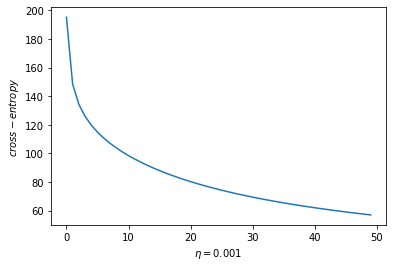

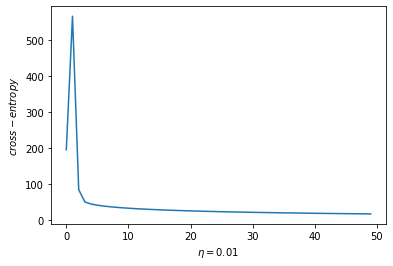

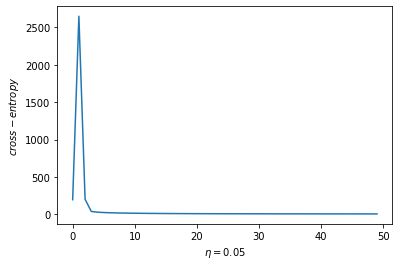

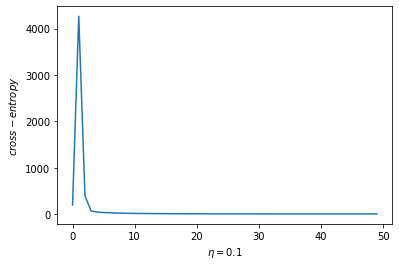

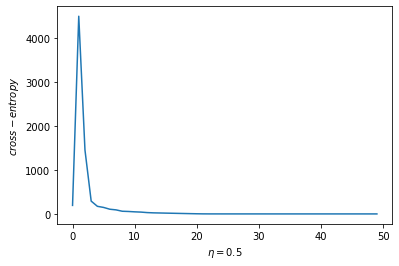

In [116]:
#Set w = 0, b = 0.1 as w[0], then plus one column of 1 into X

on = np.ones((463,1))
X_train = np.c_[on, X]
iteration = 50
eta = [0.001, 0.01, 0.05, 0.1, 0.5]
#Entropy error:
for iy in range(5):
    E1 = np.zeros(50)
    w = np.zeros(len(dic) + 1)
    b = 0.1
    w[0] = b
    for i in range(iteration):
        ee = np.zeros(len(dic) + 1)
        # calculate error 
        for j in range(463):
            temp1 = sigmoid((w.dot(X_train[j, :].T)))
            if temp1 < 1e-16:
                temp1 = 1e-16
            else:
                temp1 = temp1
            temp2 = sigmoid(1 - (w.dot(X_train[j, :].T)))
            if temp2 < 1e-16:
                temp2 = 1e-16
            else:
                temp2 = temp2
            if y[j] == 0:
                E1[i] = E1[i] - math.log((1 - y[j]) * temp2)
            else:
                E1[i] = E1[i] - (math.log(y[j] * temp1))
        
            ee = ee + (temp1 - y[j]) * X_train[j, :]
            
        #update w
        w = w - eta[iy] * ee
        
    print(np.sqrt(np.sum(w**2)))
    plt.figure(iy + 1)
    plt.plot(range(0, 50), E1)
    plt.ylabel(r"$cross-entropy$")
    plt.xlabel(r"$η = %s$" %eta[iy])


Q3.4c: Setting λ = 0.1, plot cross-rntropy

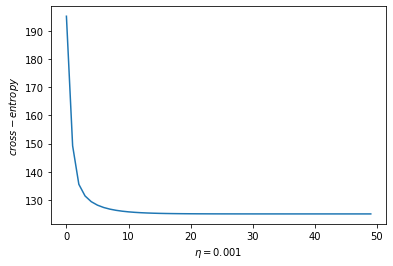

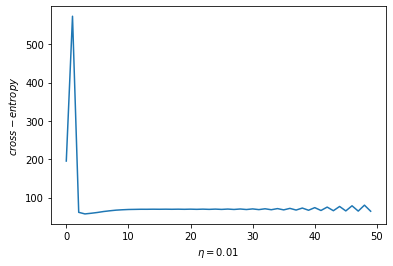

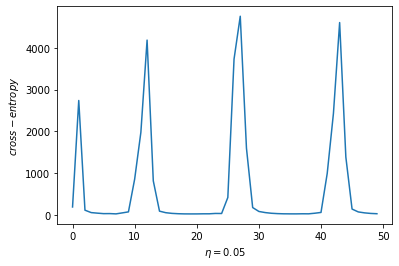

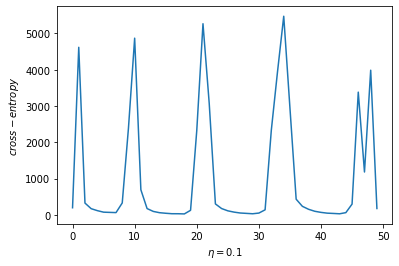

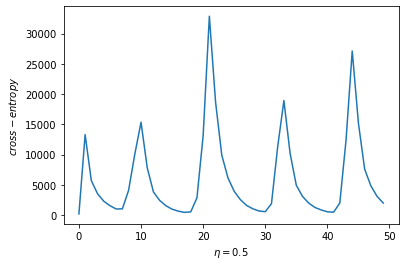

In [122]:
lamda = 0.1
iteration = 50
eta = [0.001, 0.01, 0.05, 0.1, 0.5]
#Cross-ntropy:
for iy in range(5):
    E2 = np.zeros(50)
    w = np.zeros(len(dic) + 1)
    b = 0.1
    w[0] = b
    for i in range(iteration):
        ee = np.zeros(len(dic) + 1)
        # calculate error 
        for j in range(463):
            temp1 = sigmoid((w.dot(X_train[j, :].T)))
            if temp1 < 1e-16:
                temp1 = 1e-16
            else:
                temp1 = temp1
            temp2 = sigmoid(1 - (w.dot(X_train[j, :].T)))
            if temp2 < 1e-16:
                temp2 = 1e-16
            else:
                temp2 = temp2
            if y[j] == 0:
                E2[i] = E2[i] - math.log((1 - y[j]) * temp2)
            else:
                E2[i] = E2[i] - (math.log(y[j] * temp1))
        
            ee = ee + (temp1 - y[j]) * X_train[j, :]
        
        #update w
        E2[i] = E2[i] + lamda * (np.sum(w**2))
        w = w - eta[iy] * ee - 2 * lamda * w
        
    #print(np.sqrt(np.sum(w**2)))
    plt.figure(iy + 1)
    plt.plot(range(0, 50), E2)
    plt.ylabel(r"$cross-entropy$")
    plt.xlabel(r"$η = %s$" %eta[iy])


In [125]:
eta = 0.01
iteration = 50
lamda = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for iy in range(6):
    E2 = np.zeros(50)
    w = np.zeros(len(dic) + 1)
    b = 0.1
    w[0] = b
    for i in range(iteration):
        ee = np.zeros(len(dic) + 1)
        # calculate error 
        for j in range(463):
            temp1 = sigmoid((w.dot(X_train[j, :].T)))
            if temp1 < 1e-16:
                temp1 = 1e-16
            else:
                temp1 = temp1
            temp2 = sigmoid(1 - (w.dot(X_train[j, :].T)))
            if temp2 < 1e-16:
                temp2 = 1e-16
            else:
                temp2 = temp2
            if y[j] == 0:
                E2[i] = E2[i] - math.log((1 - y[j]) * temp2)
            else:
                E2[i] = E2[i] - (math.log(y[j] * temp1))
        
            ee = ee + (temp1 - y[j]) * X_train[j, :]
        
        #update w
        E2[i] = E2[i] + lamda[iy] * (np.sum(w**2))
        w = w - eta * ee - 2 * lamda[iy] * w
        
    print(np.sqrt(np.sum(w**2)))

8.010676489844947
2.020004223659961
2.105103019403681
1.2222550014399887
2.7340885299880453
2.931587563931716
